In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Dataset .csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Clean the data
# df = pd.read_csv('restaurants.csv')
df = df.dropna(subset=['Latitude', 'Longitude'])

# Initialize map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add clustered markers
marker_cluster = MarkerCluster().add_to(restaurant_map)
for _, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

# Save or display the map
restaurant_map.save("restaurant_map.html")


In [7]:
city_group = df.groupby('City').agg({
    'Restaurant Name': 'count',  # Number of restaurants
    'Aggregate rating': 'mean',  # Average rating
    'Price range': 'mean'  # Average price range
}).reset_index()

city_group.rename(columns={'name': 'restaurant_count'}, inplace=True)


In [15]:
city_group.head()

,City,restaurant_count,Aggregate rating,Price range
0,Abu Dhabi,20,4.300000,3.300000
1,Agra,20,3.965000,2.650000
2,Ahmedabad,21,4.161905,2.571429
3,Albany,20,3.555000,1.700000
4,Allahabad,20,3.395000,2.650000


In [16]:
city_group.rename(columns={'Restaurant Name': 'restaurant_count'}, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_106176\64596020.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='restaurant_count',y='City', palette='viridis')


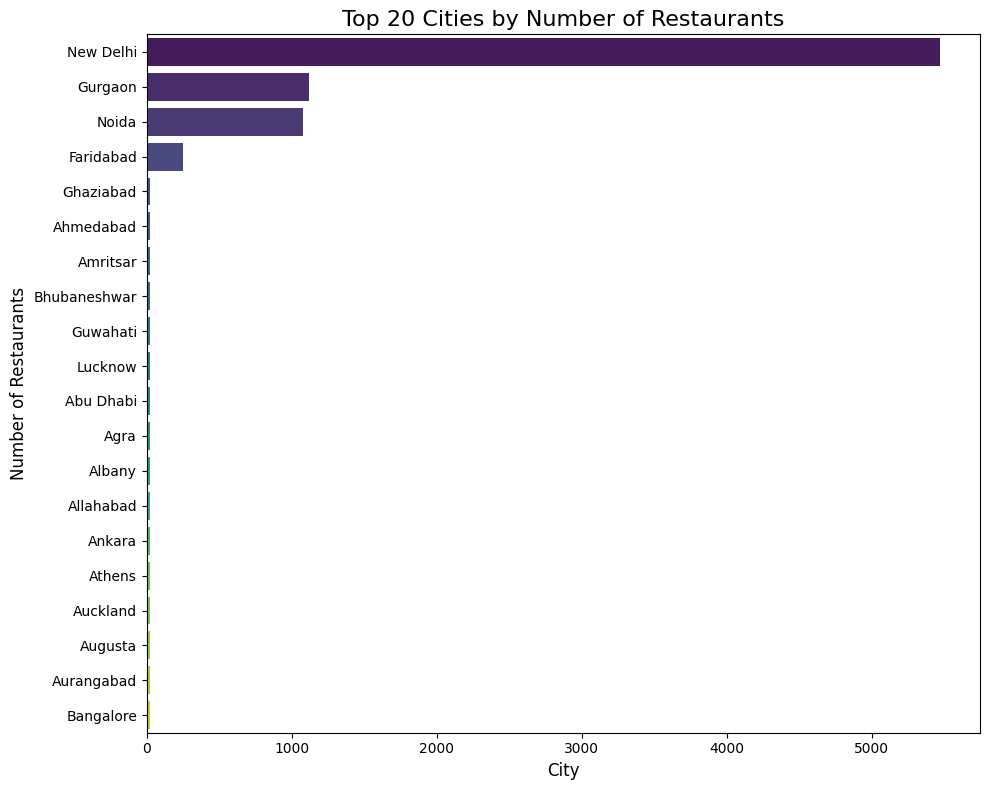

In [23]:

top_cities = city_group.nlargest(20, 'restaurant_count')

# Plot a horizontal bar chart for better readability
plt.figure(figsize=(10, 8))
sns.barplot(data=top_cities, x='restaurant_count',y='City', palette='viridis')
plt.title('Top 20 Cities by Number of Restaurants', fontsize=16)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.tight_layout()
plt.show()



In [25]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [27]:
# Group by City and calculate the average rating
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Rename columns for clarity
average_rating_by_city.columns = ['City', 'Aggregate rating']

# Display the top 10 cities with the highest average ratings
print(average_rating_by_city.sort_values('Aggregate rating', ascending=False).head(10))


                 City  Aggregate rating
56         Inner City          4.900000
107       Quezon City          4.800000
73        Makati City          4.650000
95         Pasig City          4.633333
75   Mandaluyong City          4.625000
15         Beechworth          4.600000
67             London          4.535000
123       Taguig City          4.525000
122     Tagaytay City          4.500000
116      Secunderabad          4.500000


In [28]:
# Group by City and get the unique cuisines
unique_cuisines_by_city = df.groupby('City')['Cuisines'].apply(lambda x: x.nunique()).reset_index()

# Rename columns for clarity
unique_cuisines_by_city.columns = ['City', 'Number of Unique Cuisines']

# Display the top 10 cities with the most unique cuisines
print(unique_cuisines_by_city.sort_values('Number of Unique Cuisines', ascending=False).head(10))


           City  Number of Unique Cuisines
88    New Delhi                        892
50      Gurgaon                        362
89        Noida                        248
43    Faridabad                         87
2     Ahmedabad                         21
29   Coimbatore                         20
58       Jaipur                         20
117     Sharjah                         20
36   Des Moines                         20
30      Colombo                         20


In [30]:
# Group by City and calculate average price range
average_price_by_city = df.groupby('City')['Price range'].mean().reset_index()

# Rename columns for clarity
average_price_by_city.columns = ['City', 'Average Price Range']

# Display the top 10 cities with the highest average price range
print(average_price_by_city.sort_values('Average Price Range', ascending=False).head(10))


                 City  Average Price Range
104         Princeton             4.000000
56         Inner City             4.000000
133  Vineland Station             4.000000
60       Johannesburg             4.000000
93          Panchkula             4.000000
94         Pasay City             4.000000
97        Paynesville             4.000000
113           Sandton             3.818182
75   Mandaluyong City             3.750000
103          Pretoria             3.700000


In [33]:
city_stats = pd.merge(average_rating_by_city, unique_cuisines_by_city, on='City')
city_stats = pd.merge(city_stats, average_price_by_city, on='City')

# Display the top 10 cities with highest average ratings
print(city_stats.sort_values('Aggregate rating', ascending=False).head(10))

                 City  Aggregate rating  Number of Unique Cuisines  \
56         Inner City          4.900000                          2   
107       Quezon City          4.800000                          1   
73        Makati City          4.650000                          2   
95         Pasig City          4.633333                          3   
75   Mandaluyong City          4.625000                          4   
15         Beechworth          4.600000                          1   
67             London          4.535000                         15   
123       Taguig City          4.525000                          4   
122     Tagaytay City          4.500000                          1   
116      Secunderabad          4.500000                          2   

     Average Price Range  
56                  4.00  
107                 3.00  
73                  3.00  
95                  3.00  
75                  3.75  
15                  2.00  
67                  3.00  
123          

C:\Users\HP\AppData\Local\Temp\ipykernel_106176\4270273084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_ratings, x='Aggregate rating', y='City', palette='coolwarm')


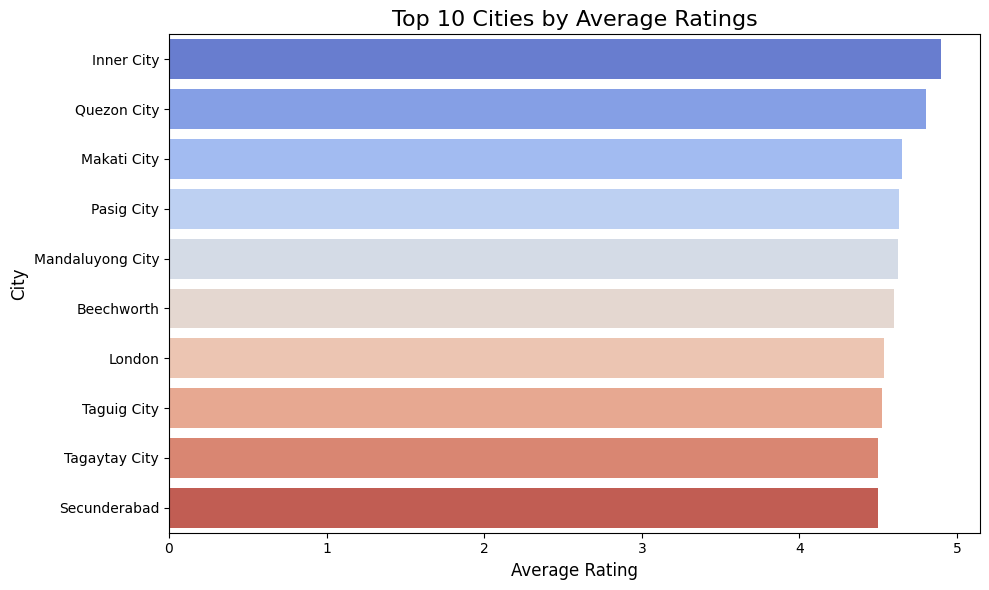

In [35]:
# Plot the top 10 cities by average rating
top_cities_ratings = average_rating_by_city.sort_values('Aggregate rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_ratings, x='Aggregate rating', y='City', palette='coolwarm')
plt.title('Top 10 Cities by Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_106176\2601470093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_cuisines, x='Number of Unique Cuisines', y='City', palette='viridis')


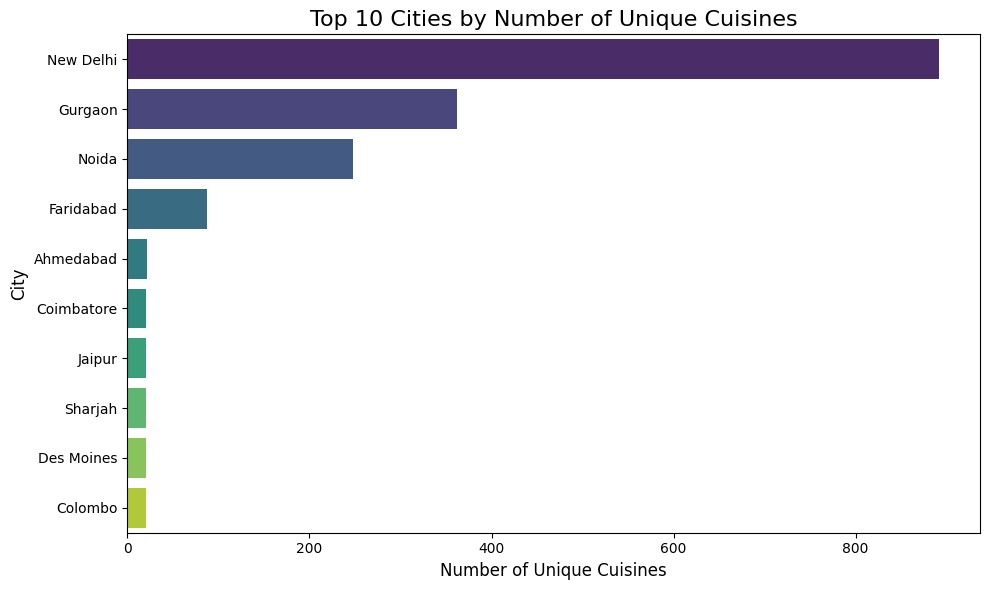

In [36]:
# Plot the top 10 cities by unique cuisines
top_cities_cuisines = unique_cuisines_by_city.sort_values('Number of Unique Cuisines', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_cuisines, x='Number of Unique Cuisines', y='City', palette='viridis')
plt.title('Top 10 Cities by Number of Unique Cuisines', fontsize=16)
plt.xlabel('Number of Unique Cuisines', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()
